In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
import re
import networkx as nx

In [2]:
tips = pd.read_csv("https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Data-sources/tips.csv",sep = ',', encoding = 'utf-8')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
print('Mida del dataset:',tips.shape)

Mida del dataset: (244, 7)


In [5]:
print('Nombre de dimensions:',tips.ndim)

Nombre de dimensions: 2


In [6]:
print('Columnes del dataset:\n\n',tips.columns)

Columnes del dataset:

 Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [7]:
print('Tipus de variables\n\n',tips.dtypes)

Tipus de variables

 total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


In [8]:
#Agregació d'una columna amb els tantpercents
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


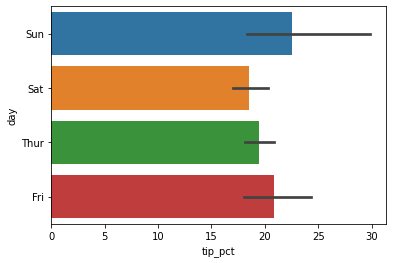

In [9]:
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

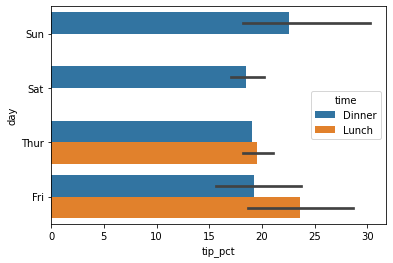

In [10]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")

In [11]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,20.212418
std,8.902412,1.383638,0.951100,16.338588
min,3.070000,1.000000,1.000000,3.700000
25%,13.347500,2.000000,2.000000,14.830000
50%,17.795000,2.900000,2.000000,18.310000
75%,24.127500,3.562500,3.000000,23.682500
max,50.810000,10.000000,6.000000,245.240000


In [12]:
round(tips.describe(include='all'), 3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


In [13]:
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [14]:
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

In [17]:
#dona error perque round no es un atribut de la clase float 
#es una Built-in function
(tips['tip']).median().round(3)

AttributeError: 'float' object has no attribute 'round'

C:\Users\adria\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


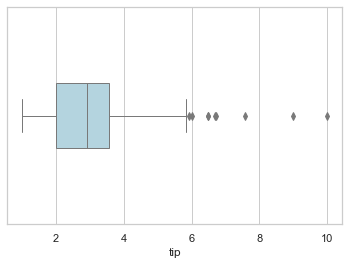

In [18]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

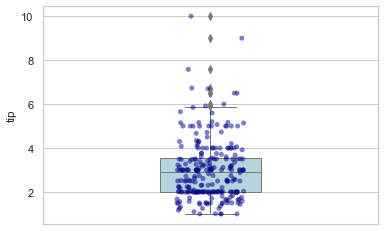

In [19]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)



In [20]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
tip_pct       float64
dtype: object

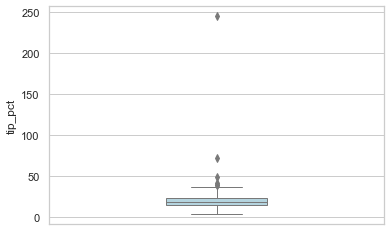

In [21]:
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

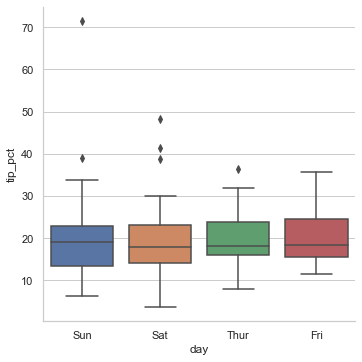

In [22]:
#afegim la variable categòrica 'day' en l'eix  x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

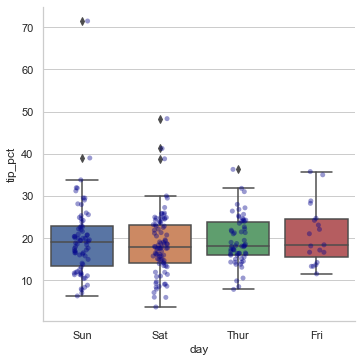

In [23]:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

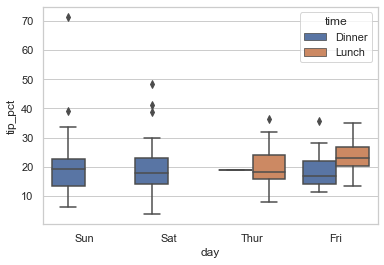

In [24]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245]);

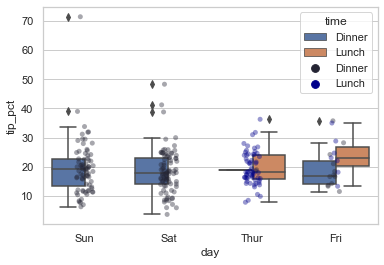

In [25]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);


### Facet Grids y Categorical DataFrame

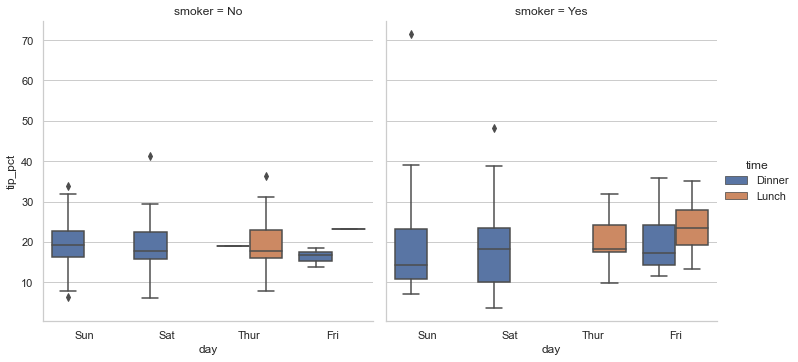

In [26]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

# <center> Exercici 2 

## Realització de la pràctica amb el dataset 'movies.dat'

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Pre-processing-data/movies.dat",sep ='::',encoding='ISO-8859-1', warn_bad_lines = True,engine='python',names=["Title","Gender"])
df['Year']=df['Title'].str.extract('\(([1-2][0-9]{3})\)')
df['Title'] = df['Title'].str.replace(r"\(.*\)","")
df.tail(2)

,Title,Gender,Year
3951,Two Family House,Drama,2000
3952,"Contender, The",Drama|Thriller,2000


In [5]:
print('Mida del Dataset:',df.shape)

Mida del Dataset: (3883, 3)


In [6]:
print('Dimensions del dataset:',df.ndim)

Dimensions del dataset: 2


In [7]:
print('Columnes del dataset:\n\n',df.columns)

Columnes del dataset:

 Index(['Title', 'Gender', 'Year'], dtype='object')


In [8]:
print('Tipus de variables:')
df.dtypes

Tipus de variables:


Title     object
Gender    object
Year      object
dtype: object

## Variable numerica

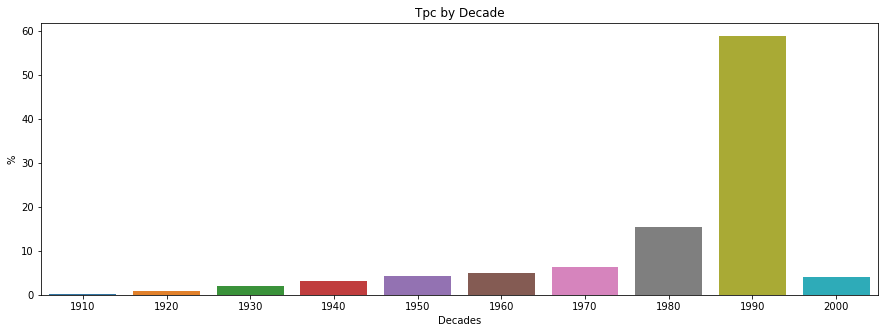

In [4]:


decades={}
for year in df['Year']:
    dec = (int(year)//10)*10
    if dec in decades:
        decades[dec]+=1
    else:
        decades[dec]=1
values= decades.values()
total =sum(values)
tpc_decade={k : (round((v/total)*100,2)) for (k,v) in decades.items()}
dataset = pd.DataFrame(tpc_decade.items())
plt.figure(figsize=(15,5))
ax = sns.barplot(x=0, y=1, data=dataset)
ax.set(xlabel = 'Decades', ylabel='%', title='Tpc by Decade')



plt.show()


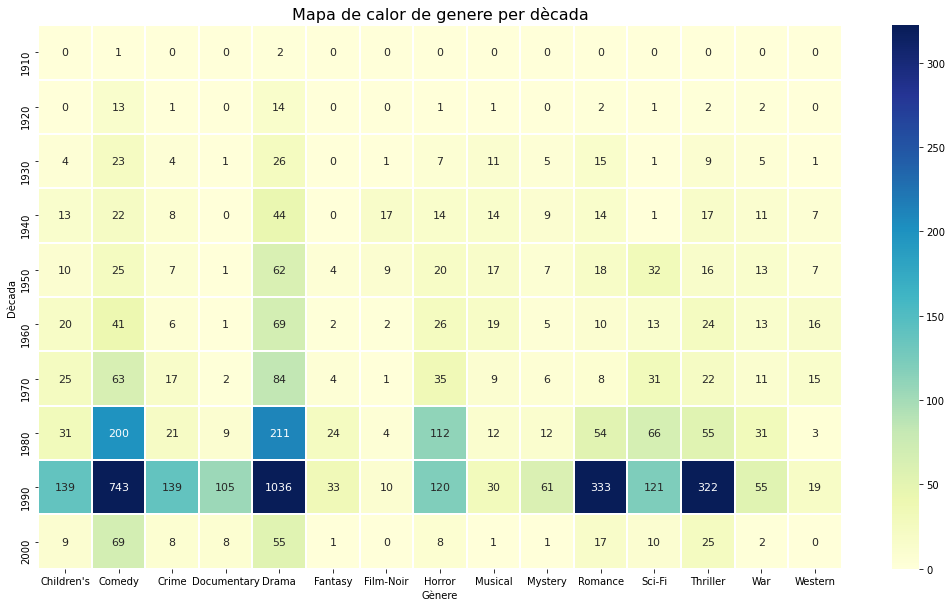

In [5]:

df2=df[['Gender','Year']]

df2['Decade']=df2.Year.astype(int)


df2['Decade']=df2.Decade.astype(int)//10*10
#df
df_dum = df2.Gender.str.get_dummies(sep='|')
genderByDecade=df2.join(df_dum)
a=genderByDecade.groupby('Decade').sum().iloc[:,3:]


merge = pd.merge(genderByDecade,a)
top_decade= (a.idxmax(axis=1))

plt.figure(figsize=(18,10))
sns.heatmap(a,cmap='YlGnBu',annot=True, annot_kws={'size':11},robust=True,fmt ='.0f',mask=0,linewidths=1, linecolor='w')
plt.title('Mapa de calor de genere per dècada',fontdict={'fontsize':16})
plt.xlabel('Gènere')
plt.ylabel('Dècada')
plt.show()


## Variable numèrica y categòrica 

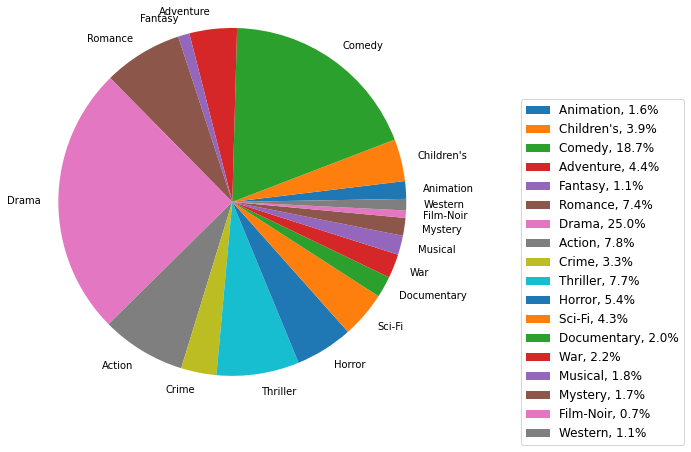

In [84]:
data={}
labels=[]
sizes=[]
count=0
for name in df['Gender']:
    for gender in name.split('|'):
        if gender in data:
            data[gender]+=1
        else:
            data[gender]=1
data

for x,y in data.items():
    labels.append(x)
    sizes.append(y)
plt.pie(sizes,
        labels=labels,
        
        radius = 2,
       startangle=1,
       )
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 12},
    bbox_to_anchor=(1.8, 1),
    
)

plt.show()



# Xarxa de Conexions per genere

Animation
Children's
Comedy
Adventure
Fantasy
Romance
Drama
Action
Crime
Thriller
Horror
Sci-Fi
Documentary
War
Musical
Mystery
Film-Noir
Western
Introdueix el genere principal: Drama


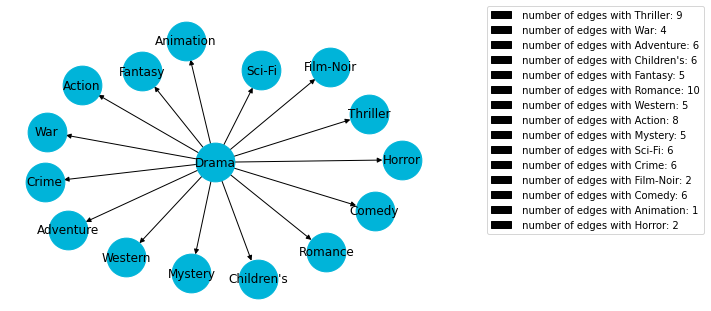

In [19]:
genderIndx=[]
mixgenders=[]
for name in df['Gender']:
    for gender in name.split('|'):
        if gender not in genderIndx:
            genderIndx.append(gender)



for name in df['Gender']:
    if '|' in name:
        mixgenders.append(name)
for gender in mixgenders:
    for repeat in mixgenders:
        if gender == repeat:
            mixgenders.remove(repeat)

mixgenders=list(dict.fromkeys(mixgenders))

gender={}
for name in genderIndx:
    gender[name]=list()
    for mix in mixgenders:
        if name in mix.split('|'):
            gender[name].append(mix)
df3 = pd.DataFrame.from_dict(gender,orient='Index')
df3=df3.transpose()
df3.dropna()

G = nx.DiGraph()

#tmp=input('Indica el gènere que vols elavuar: ')
for name in genderIndx:
    print(name)
tmp=input('Introdueix el genere principal: ')


G.add_node(tmp)
node_count={}
for name in df3[tmp].dropna():
        name= name.split('|')
        name.remove(tmp)
        for n in name:
            if n not in node_count:
                node_count[n]=1
            else:
                node_count[n]+=1
            
                
            G.add_node(n)
            G.add_edge(tmp,n)
        

nx.draw(G, with_labels=True, node_size=1500,node_color='#00b4d9' , pos=nx.spring_layout(G))
legend=[]

for k,v in node_count.items():
    times = ' number of edges with '+str(k)+': '+str(v)
    
    legend.append(times) 
    
plt.legend(legend,bbox_to_anchor=(1.1, 1.05))

plt.show()
